In [1]:
import pandas as pd
import numpy as np


importing Required Libraries

In [2]:
df = pd.read_csv(r"D:\My Drive\MBA project\Predictive-Analysis-on-Telecom-Customer-churn-A-Case-Study-on-AIRTEL\Predictive-Analysis-on-Telecom-Customer-churn-A-Case-Study-on-AIRTEL\data\Airtel_customer.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Reading Airtel customer csv file

In [3]:
print("Total Customers:", len(df))
df.info()


Total Customers: 7043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [5]:
df_recent = df[df["tenure"] <= 24].copy()

print("Customers in Recent 2-Year Dataset:", len(df_recent))
df_recent.head()


Customers in Recent 2-Year Dataset: 3210


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


We keep only customers whose tenure ≤ 24 months (recent customers). now lets check 2 years churn rate

In [6]:
churn_rate = df_recent["Churn"].value_counts(normalize=True) * 100
churn_rate


Churn
No     58.535826
Yes    41.464174
Name: proportion, dtype: float64

As per data there is 58.53 no and 41.46 yes churn rate in recent years.

Now extracting 2 years data and save it as csv file for better understanding

In [7]:
# Filter only customers with tenure <= 24 months
df_recent = df[df["tenure"] <= 24].copy()

# Save the filtered dataset
df_recent.to_csv(r"D:\My Drive\MBA project\Predictive-Analysis-on-Telecom-Customer-churn-A-Case-Study-on-AIRTEL\Predictive-Analysis-on-Telecom-Customer-churn-A-Case-Study-on-AIRTEL\data\Telco_Recent_2Years.csv", index=False)

print("Saved successfully as data/Telco_Recent_2Years.csv")
print("Total customers:", len(df_recent))


Saved successfully as data/Telco_Recent_2Years.csv
Total customers: 3210


Telco_Recent_2Years.csv added ( in this way will avoid data duplication and extract data only study needed.)

lets Load the Recent 2-Year Dataset

In [8]:
def new_func():
    df = pd.read_csv(r"D:\My Drive\MBA project\Predictive-Analysis-on-Telecom-Customer-churn-A-Case-Study-on-AIRTEL\Predictive-Analysis-on-Telecom-Customer-churn-A-Case-Study-on-AIRTEL\data\Telco_Recent_2Years.csv")
    return df

df = new_func()
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
3,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
4,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


checking the Size of the 2-Year Dataset

In [9]:
print("Total customers in 2-year dataset:", len(df))


Total customers in 2-year dataset: 3210


total customer in 2 years is 3210

In [10]:
df['Churn'].value_counts()


Churn
No     1879
Yes    1331
Name: count, dtype: int64

In [11]:
df['Churn'].value_counts(normalize=True) * 100


Churn
No     58.535826
Yes    41.464174
Name: proportion, dtype: float64

recent wto year customer churn rate is 41.46%

In [12]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,3210.000000,3210.000000,3210.000000,3210.000000
mean,0.152025,9.076324,57.775576,551.499011
std,0.359101,7.304794,27.278485,562.494136
min,0.000000,0.000000,18.750000,18.800000
25%,0.000000,2.000000,25.550000,97.025000
50%,0.000000,7.000000,60.075000,335.525000
75%,0.000000,15.000000,80.200000,841.712500
max,1.000000,24.000000,112.950000,2542.450000


Summary of Numeric Columns

In [13]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df['tenure'].describe()


count    3210.000000
mean        9.076324
std         7.304794
min         0.000000
25%         2.000000
50%         7.000000
75%        15.000000
max        24.000000
Name: tenure, dtype: float64

noted - Tenure Distribution = minimum 0 and maximum = 24

In [15]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col, "→", df[col].nunique(), "unique values")


customerID → 3210 unique values
gender → 2 unique values
Partner → 2 unique values
Dependents → 2 unique values
PhoneService → 2 unique values
MultipleLines → 3 unique values
InternetService → 3 unique values
OnlineSecurity → 3 unique values
OnlineBackup → 3 unique values
DeviceProtection → 3 unique values
TechSupport → 3 unique values
StreamingTV → 3 unique values
StreamingMovies → 3 unique values
Contract → 3 unique values
PaperlessBilling → 2 unique values
PaymentMethod → 4 unique values
Churn → 2 unique values


noted:

How many contract types : 3

How many internet service types : 3

How churn is influenced by categorical variables : 2

EDA basic is completed, lets dive into EDA graph 

To find the main factors that influence customer churn, we compare customer traits and service features with churn status. These comparisons show patterns that explain why some customers leave and others remain. This helps us create effective strategies to keep customers.


1. Tenure vs Churn
2. Contract Type vs Churn
3. Internet Service vs Churn
4. Monthly Charges vs Churn
5. Payment Method vs Churn
6. Paperless Billing vs Churn
7. Tech Support vs Churn
8. Online Security vs Churn
 

Tenure vs Churn (Graph) 👇

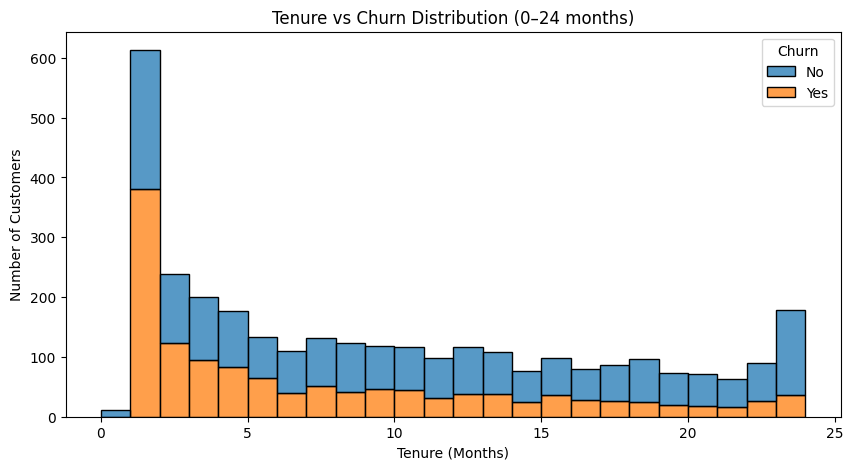

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_recent = df  # your filtered 2-year dataset

plt.figure(figsize=(10,5))
sns.histplot(data=df_recent, x="tenure", hue="Churn", multiple="stack", bins=24)
plt.title("Tenure vs Churn Distribution (0–24 months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()


Key Insights from Tenure vs Churn (0–24 Months)

1. Highest churn occurs in the first 1–3 months

The orange bars (Churn = Yes) are largest at tenure 0–3 months.
This means many customers leave Airtel quickly after joining.

2. Churn decreases gradually as tenure increases

From 4 to 12 months, churn becomes lower but still noticeable.

3. Customers who stay for 18–24 months rarely churn

The blue bars dominate in the higher tenures, showing customer loyalty increases over time.



Conclusion

Early experience is the biggest churn driver. Airtel must focus on:

onboarding experience

service quality in first months

customer support

targeted offers for new customers

Contract Type vs Churn (Graph) 👇

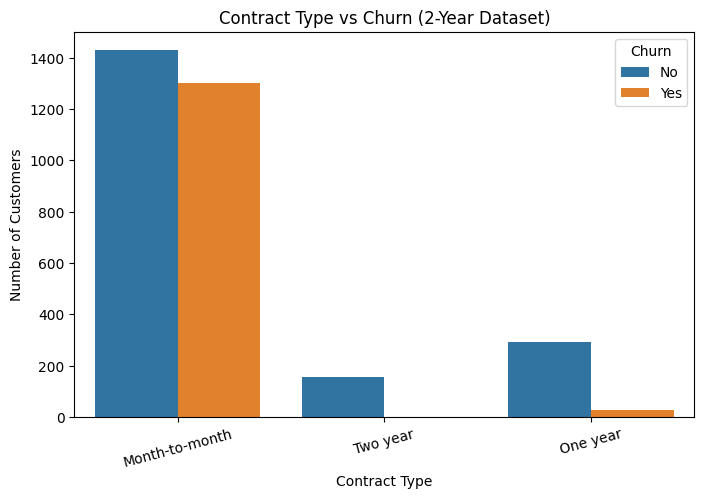

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn (2-Year Dataset)")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()


Summary — Contract Type vs Churn 

Month-to-month customers have the highest churn rate.

One-year contract customers show low churn.

Two-year contract customers show almost zero churn.

Short-term contracts are a strong churn indicator.

Longer contracts significantly improve customer retention.


Internet Service vs Churn (Graph) 👇

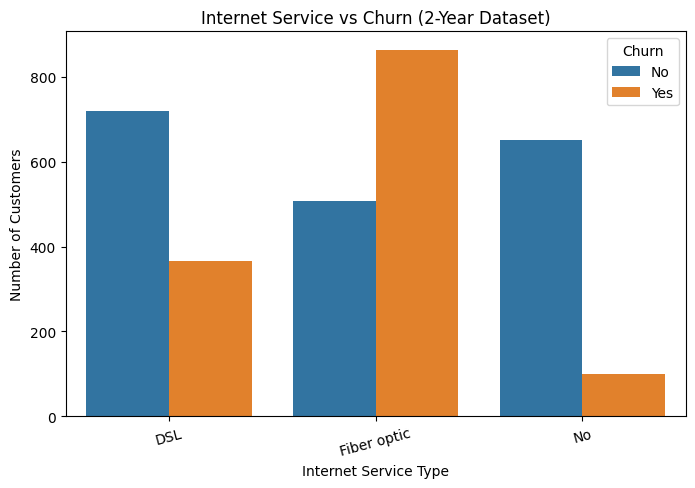

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Internet Service vs Churn (2-Year Dataset)")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()


Summary - Internet Service vs Churn (Graph)

Fiber optic users show the highest churn among all service types.

DSL users have moderate churn, lower than fiber but higher than “No internet.”

Customers with No internet service churn the least, showing strong retention.

Fiber optic churn indicates possible service quality issues or customer dissatisfaction.

Internet service type is a key factor influencing churn in the first 2 years.

Monthly Charges vs Churn (Graph) 👇

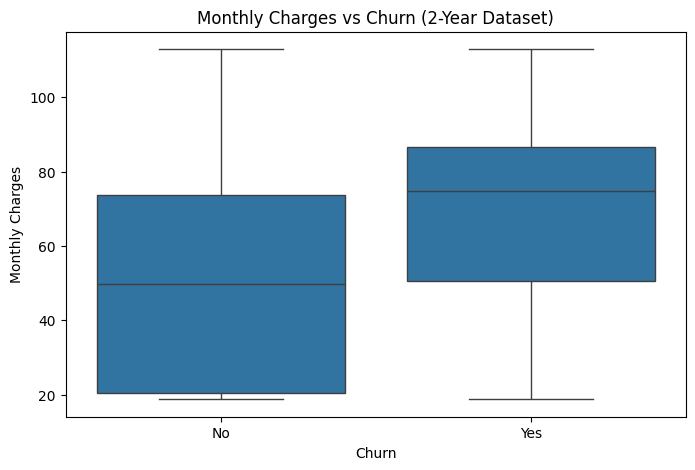

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn (2-Year Dataset)")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


Summary - Monthly Charges vs Churn (Graph)

Customers who churn have higher monthly charges on average than those who stay.

The median monthly charge for churned customers is significantly higher.

High-paying customers show greater dissatisfaction or price sensitivity, leading to churn.

Non-churn customers have a wider bill range, but their median is much lower.

Monthly billing amount is a strong predictor of churn in the first 2 years.

Payment Method vs Churn (Graph) 👇

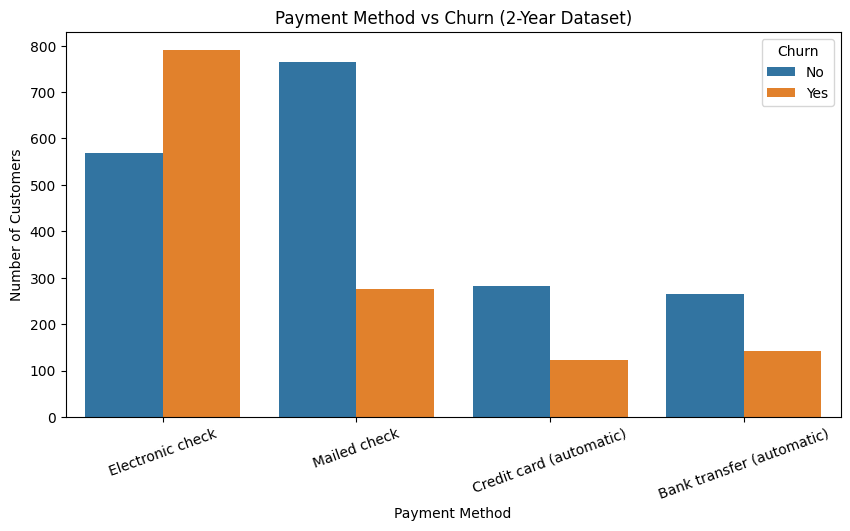

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Payment Method vs Churn (2-Year Dataset)")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=20)
plt.show()


Summary - Payment Method vs Churn (Graph)

Electronic check users have the highest churn rate of all payment methods.

Electronic check churn count is greater than non-churn, signaling customers using this method are highly unstable.

Mailed check customers show moderate churn, lower than electronic check but still significant.

Credit card (automatic) users have low churn, showing strong customer stability.

Bank transfer (automatic) customers also show low churn, similar to credit card auto-pay.

Automatic payment methods (credit card / bank transfer) are strong indicators of high retention.

Manual payment methods (electronic check, mailed check) increase the likelihood of churn.

Paperless Billing vs Churn graph 👇

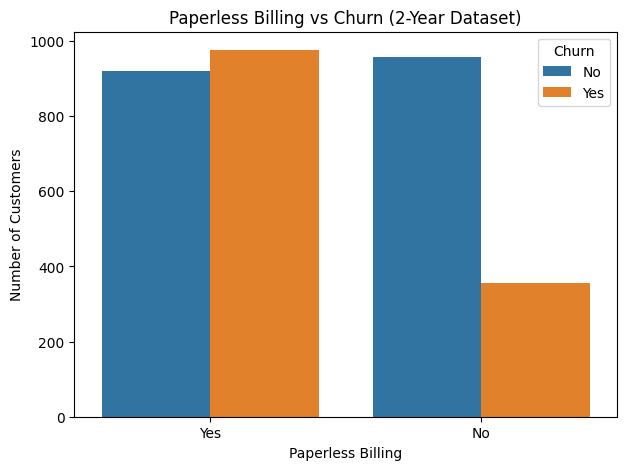

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="PaperlessBilling", hue="Churn")
plt.title("Paperless Billing vs Churn (2-Year Dataset)")
plt.xlabel("Paperless Billing")
plt.ylabel("Number of Customers")
plt.show()


Summary - Paperless Billing vs Churn graph

Customers with Paperless Billing = Yes show a high churn rate, almost equal to or higher than non-churn.

Customers who do not use paperless billing have much lower churn.

Paperless billing users appear more price-sensitive and churn-prone.

Paperless billing is commonly used with month-to-month plans, which already have high churn.

Non-paperless billing customers (traditional billing) tend to be more loyal and stable.

Paperless billing status is a useful churn predictor, especially in early tenure (0–24 months).

Tech Support vs Churn graph 👇

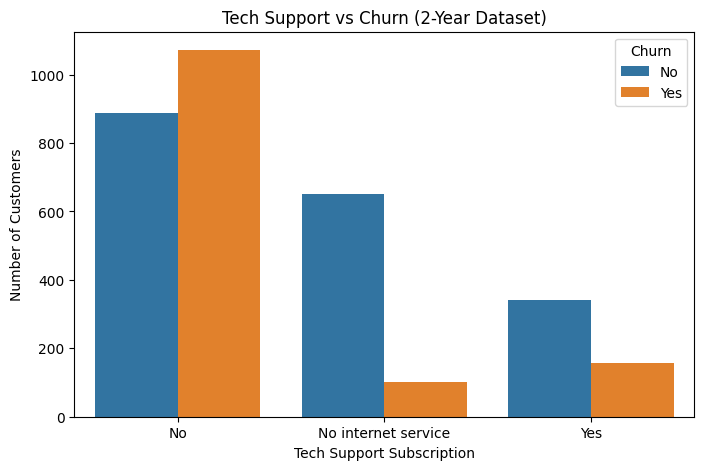

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="TechSupport", hue="Churn")
plt.title("Tech Support vs Churn (2-Year Dataset)")
plt.xlabel("Tech Support Subscription")
plt.ylabel("Number of Customers")
plt.show()


Summary - Tech Support vs Churn graph

Customers with No Tech Support show the highest churn rate in the 2-year dataset.

Customers who subscribe to Tech Support churn significantly less.

“No internet service” customers have very low churn, similar to earlier patterns.

Lack of technical support strongly increases the risk of dissatisfaction and churn.

Tech Support availability is a major retention factor for telecom customers.

Online Security vs Churn graph 👇

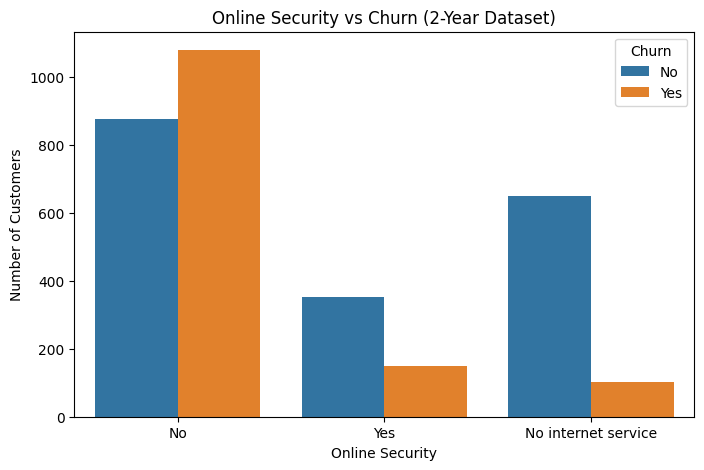

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn")
plt.title("Online Security vs Churn (2-Year Dataset)")
plt.xlabel("Online Security")
plt.ylabel("Number of Customers")
plt.show()


Summary - Online Security vs Churn graph

Customers with No Online Security show the highest churn rate, even higher than the number who stay.

Customers who subscribe to Online Security have significantly lower churn.

“No internet service” customers continue to show very low churn, similar to earlier comparisons.

Lack of security features increases churn, indicating risk perception and support needs influence customer decisions.

Online Security acts as a value-added service that improves customer retention.

End of the EDA graph Section

Overall, the exploratory analysis shows the key behavioral and service-related factors that impact customer churn within the first two years. Patterns in tenure, contract type, service features, billing behavior, and payment preferences indicate which customer groups are most at risk of leaving. These insights create a solid base for developing predictive models. They also help pinpoint specific areas where Airtel can take focused actions to improve retention and lower churn. for final summary please visit - report\EDA_summary.md